# Activity Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings("ignore")


## Data Collection & Analysis

In [2]:

df=pd.read_csv("dataset.csv",sep=",",encoding="utf-8")
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [3]:

df.shape

(1215745, 14)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


## Data Preprocessing

In [5]:
df.isnull().any()

alx         False
aly         False
alz         False
glx         False
gly         False
glz         False
arx         False
ary         False
arz         False
grx         False
gry         False
grz         False
Activity    False
subject     False
dtype: bool

there is no missing data found in the sheet

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop(["subject"], axis=1)

#### Checking imbalanced data and resampling

<Axes: title={'center': 'Data Before sampling'}, xlabel='Activity'>

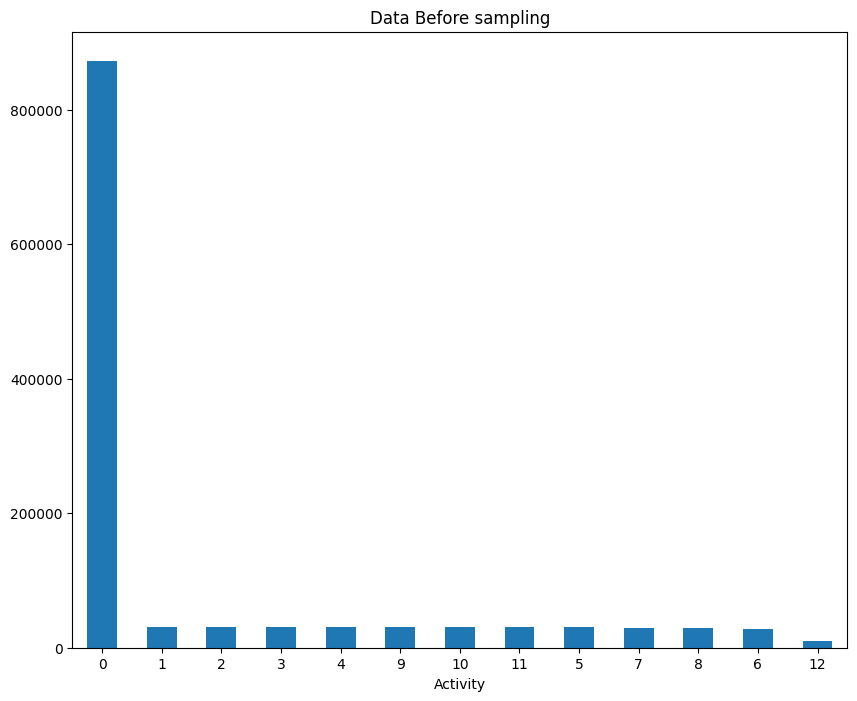

In [8]:
#Before resampling
plt.figure(figsize=(10 ,8 ))
plt.title('Data Before sampling')
df['Activity'].value_counts().plot.bar(rot=0)

In [9]:
# Resampling activity 0 to 40000 observations
data_activity_0 = df[df['Activity'] == 0]
data_activity_else = df[df['Activity'] != 0]

data_activity_0 = data_activity_0.sample(n=40000, random_state=42)
df = pd.concat([data_activity_0, data_activity_else])

<Axes: title={'center': 'Data afetr sampling'}, xlabel='Activity'>

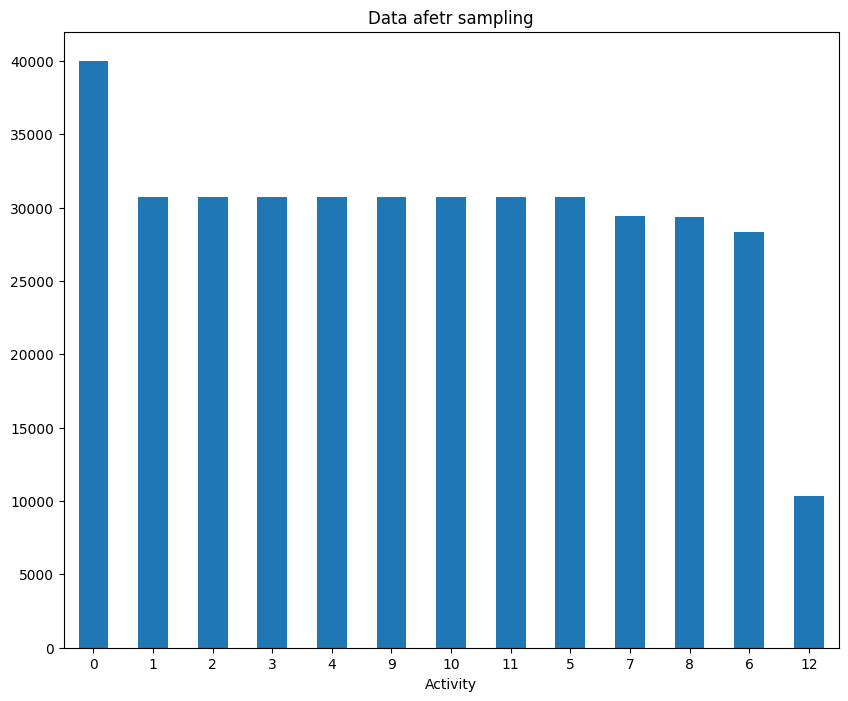

In [10]:
plt.figure(figsize=(10 ,8 ))
plt.title('Data afetr sampling')
df['Activity'].value_counts().plot.bar(rot=0)

## EDA & Visualization

In [11]:
# giving labels to our values
activities_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

## Decoding

In [12]:
#### the discrete column (Activity)from the dataset needs to be repaired :

In [13]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None','Standing still (1 min)', 'Sitting and relaxing (1 min)', 'Lying down (1 min)', 'Walking (1 min)','Climbing stairs (1 min)','Waist bends forward (20x)','Frontal elevation of arms (20x)','Knees bending (crouching) (20x)','Cycling (1 min)','Jogging (1 min)','Running (1 min)','Jump front & back (20x)'])
df['Activity']

1212350                       None
134482                        None
820343                        None
718210                        None
118798                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [14]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

<Axes: ylabel='count'>

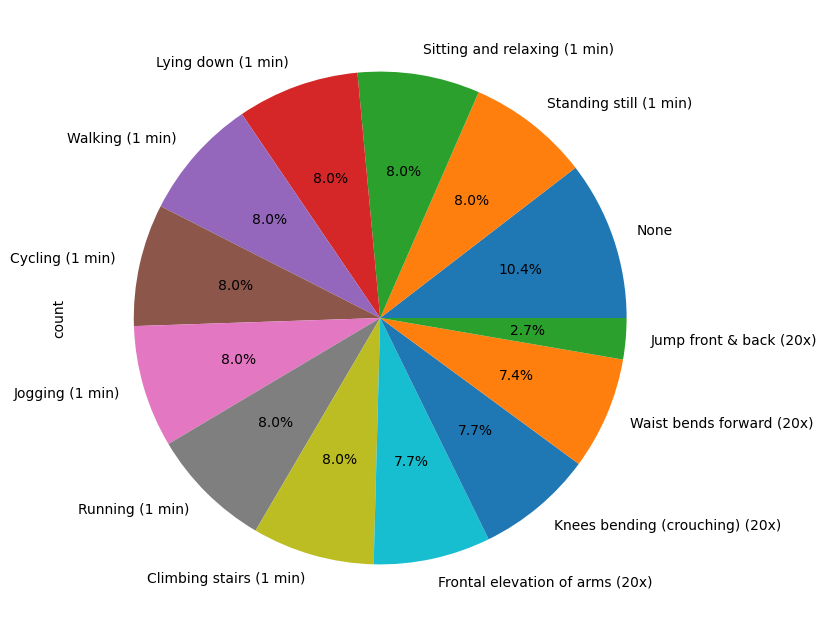

In [15]:
plt.figure(figsize=(12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [16]:

df1 = df.copy()

In [17]:
df1.shape

(383195, 13)

In [18]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

In [19]:
df1.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

## Encoding

In [20]:

le = LabelEncoder()

df['Activity'] = le.fit_transform(df['Activity'])


In [21]:
df.dtypes

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int32
dtype: object

In [22]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
1212350,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.06160,0.14655,7
134482,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.76591,0.85129,7
820343,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.99795,0.52155,7
718210,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.71047,0.90086,7
118798,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.14580,0.81897,7


### Train Test Split

In [23]:
x = df.drop(['Activity'], axis=1).values
y = df['Activity'].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
x_train.shape

(306556, 12)

In [26]:
x_test.shape

(76639, 12)

In [27]:
y_train.shape

(306556,)

In [28]:
y_test.shape

(76639,)

## Scalling using robust scaler

In [29]:
ro_scaler = RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)

In [30]:
def resultsSummarizer(y_true, y_pred):
    cr = classification_report(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    
    
    print('Classification Report:', cr)
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))
   


## KNN

In [31]:
knear=KNeighborsClassifier()
#param_grid = {'n_neighbors': [5, 10, 15, 20]}

k1 = GridSearchCV(knear, {'n_neighbors': [5]}, cv=5)

In [32]:
k1.fit(x_train,y_train)

# print("Best n_neighbors:", k1.best_params_['n_neighbors'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5]})

In [33]:
print(k1.score(x_train,y_train))
print(k1.score(x_test,y_test))

0.9161882331450045
0.8867547854225656


In [34]:
y_pred=k1.predict(x_test)

resultsSummarizer(y_test, y_pred)

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.86      0.85      6130
           1       0.91      0.96      0.93      6104
           2       0.91      0.99      0.94      5925
           3       0.79      0.88      0.83      6121
           4       0.81      0.66      0.73      2055
           5       0.87      0.93      0.90      5871
           6       0.99      1.00      0.99      6023
           7       0.83      0.52      0.64      8079
           8       0.86      0.82      0.84      6186
           9       0.98      1.00      0.99      6234
          10       0.97      1.00      0.99      6196
          11       0.90      0.96      0.93      5580
          12       0.83      0.93      0.87      6135

    accuracy                           0.89     76639
   macro avg       0.88      0.89      0.88     76639
weighted avg       0.89      0.89      0.88     76639

Accuracy Score: 88.6755%
Precision Score: 88.2581%
Recal

In [35]:
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,10,10
1,0,0
2,8,8
3,12,0
4,11,11
5,3,3
6,1,1
7,9,9
8,11,11
9,10,10


In [36]:
import pickle

pickle.dump(k1, open("KNNap.pkl", "wb"))

print(pickle.load(open("KNNap.pkl", "rb")))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5]})


## KNN with Robust Scaler

In [37]:
knear=KNeighborsClassifier()
# param_grid = {'n_neighbors': [5, 10, 15, 20]}

k2 = GridSearchCV(knear, {'n_neighbors': [5]}, cv=5)
k2.fit(x_train_scaled, y_train)

# print("Best n_neighbors:", k2.best_params_['n_neighbors'])
print(k2.score(x_train_scaled, y_train))

0.953417972572711


In [38]:
y_pred_knn = k2.predict(x_test_scaled)

In [39]:
resultsSummarizer(y_test, y_pred_knn)

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.96      0.94      6130
           1       0.95      1.00      0.97      6104
           2       0.95      1.00      0.98      5925
           3       0.87      0.95      0.91      6121
           4       0.89      0.76      0.82      2055
           5       0.93      0.99      0.96      5871
           6       0.99      1.00      0.99      6023
           7       0.95      0.64      0.76      8079
           8       0.92      0.93      0.92      6186
           9       0.98      1.00      0.99      6234
          10       0.98      1.00      0.99      6196
          11       0.95      0.99      0.97      5580
          12       0.88      0.99      0.93      6135

    accuracy                           0.94     76639
   macro avg       0.94      0.94      0.93     76639
weighted avg       0.94      0.94      0.94     76639

Accuracy Score: 93.8791%
Precision Score: 93.6988%
Recal

In [40]:
pickle.dump(k2, open("KnnRsAp.pkl", "wb"))

print(pickle.load(open("KnnRsAp.pkl", "rb")))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5]})


## Decision Tree

In [41]:
dt=DecisionTreeClassifier()

In [42]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

1.0
0.9209932279909706


## Decision Tree with Robust Scaler

In [44]:
dt2=DecisionTreeClassifier()
dt2.fit(x_train_scaled, y_train)
print(dt2.score(x_train_scaled, y_train))

1.0


In [45]:
y_pred_tree = dt2.predict(x_test_scaled)

resultsSummarizer(y_test, y_pred_tree)

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.91      0.90      6130
           1       0.96      0.97      0.97      6104
           2       0.97      0.97      0.97      5925
           3       0.92      0.92      0.92      6121
           4       0.82      0.81      0.81      2055
           5       0.93      0.94      0.93      5871
           6       0.99      0.99      0.99      6023
           7       0.73      0.70      0.72      8079
           8       0.92      0.92      0.92      6186
           9       0.98      0.98      0.98      6234
          10       0.98      0.98      0.98      6196
          11       0.95      0.96      0.95      5580
          12       0.93      0.93      0.93      6135

    accuracy                           0.92     76639
   macro avg       0.92      0.92      0.92     76639
weighted avg       0.92      0.92      0.92     76639

Accuracy Score: 92.1098%
Precision Score: 92.0016%
Recal

In [46]:

pickle.dump(dt2, open("DtRsAp.pkl", "wb"))

print(pickle.load(open("DtRsAp.pkl", "rb")))

DecisionTreeClassifier()


## Random Forest Classifier

In [47]:
rf=RandomForestClassifier()

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9999902138597841
0.9720377353566722


In [50]:
y_pred_rf = rf.predict(x_test)
resultsSummarizer(y_test, y_pred_rf)

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      6130
           1       0.97      1.00      0.99      6104
           2       0.99      1.00      0.99      5925
           3       0.96      0.98      0.97      6121
           4       0.95      0.92      0.94      2055
           5       0.97      0.99      0.98      5871
           6       0.99      1.00      0.99      6023
           7       0.97      0.81      0.88      8079
           8       0.96      0.98      0.97      6186
           9       0.98      1.00      0.99      6234
          10       0.98      1.00      0.99      6196
          11       0.97      1.00      0.99      5580
          12       0.97      1.00      0.98      6135

    accuracy                           0.97     76639
   macro avg       0.97      0.97      0.97     76639
weighted avg       0.97      0.97      0.97     76639

Accuracy Score: 97.2038%
Precision Score: 97.1181%
Recal

In [51]:
pickle.dump(rf, open("RFap.pkl", "wb"))

print(pickle.load(open("RFap.pkl", "rb")))

RandomForestClassifier()


## Random Forest Classifier with Robust Scaler

In [52]:
rfst = RandomForestClassifier()
rfst.fit(x_train_scaled, y_train)
print(rfst.fit(x_train_scaled, y_train))

RandomForestClassifier()


In [53]:
y_pred_rfst = rfst.predict(x_test_scaled)
resultsSummarizer(y_test, y_pred_rfst)

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97      6130
           1       0.97      1.00      0.99      6104
           2       0.99      1.00      0.99      5925
           3       0.96      0.98      0.97      6121
           4       0.95      0.92      0.94      2055
           5       0.97      0.99      0.98      5871
           6       0.99      1.00      0.99      6023
           7       0.97      0.81      0.88      8079
           8       0.96      0.98      0.97      6186
           9       0.98      1.00      0.99      6234
          10       0.99      1.00      0.99      6196
          11       0.97      1.00      0.99      5580
          12       0.97      0.99      0.98      6135

    accuracy                           0.97     76639
   macro avg       0.97      0.97      0.97     76639
weighted avg       0.97      0.97      0.97     76639

Accuracy Score: 97.2233%
Precision Score: 97.1424%
Recal

In [54]:
pickle.dump(rfst, open("RfRsAp.pkl", "wb"))

print(pickle.load(open("RfRsAp.pkl", "rb")))

RandomForestClassifier()
